# 1. Data to Insights


### 1.1 Business Understanding

The business problem under study here is why the best employees of this company are 
leaving pre-maturely. The company also wants us to predict which employees will be 
leaving next. 

### 1.2 Analytic Solution

We have two main goals:

* We want to understand why the good employees leave
* Predict who will leave next

We propose working with the HR department to gather significant data that can 
probably explain the cause and effect relationship under question.

### 1.3 Feasability Study

Managers in the HR department have not kept an organised report on why employees 
have left but from the data we can determine this through sound data science 
techniques. 

From the data given we have the following information: For our 15000 employees: 
satisfaction level, latest evaluation (yearly), number of project worked on, 
average monthly hours, time spend in the company (in years), 
work accident (within the past 2 years), promotion within the past 5 years, 
department and salary.

### 1.4 Analytical Base Table

This is the data provided by the HR department:

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Data Exploration

Here our aim is to asses the quality of our data, rectify and clean the data where
it might suffer and run visualizations to help us understand our data graphically.

### 2.1 Data Quality Report

In [2]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This table describe the characteristics of each features of our analytical base table. 
We can see different statistical measures of central tendency and variation. For 
example we can see that our attrition rate is equal to 24%, the satisfaction level 
is around 62% and the performance average is around 71%. We see that on average 
people work on 3 to 4 projects a year and about 200 hours per months.

## 2.2 Data Cleaning

The data had a couple of incorrectly named column names.

In [3]:
df = df.rename(columns={
    'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours'
})

The data did not have any NULL values

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

The categorical variables were 'int64' type

In [5]:
# Convert required columns to categorical
df['salary'] = df['salary'].astype('category')
df['left'] = df['left'].astype('category')
df['department'] = df['sales'].astype('category')
df = df.drop('sales', 1)
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')
df['work_accident'] = df['work_accident'].astype('category')

There were duplicate rows of data

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department
0,0.38,0.53,2,157,3,0,1,0,low,sales
1,0.80,0.86,5,262,6,0,1,0,medium,sales
2,0.11,0.88,7,272,4,0,1,0,medium,sales
3,0.72,0.87,5,223,5,0,1,0,low,sales
4,0.37,0.52,2,159,3,0,1,0,low,sales


# 3. Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4. Machine Learning

Three algorithms are compared here:
* K Nearest Neighbors Classification
* Logistic Regression
* Decision Trees

Each model is trained and tested with the same train-test split of the original dataframe.

The ROC Curve is plotted and the AUC is calculated for each algorithm.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# The categorical columns are one-hot encoded

X = pd.get_dummies(df.drop('left', axis=1)).values
y = df['left'].cat.codes.values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## 4.1 Parameter Fine-Tuning

Before running the machine learning models, the parameters for each of the models have to be chosen.

### 4.1.1 KNeighborsClassifier

The parameter `n_neighhors` is to be determined

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
knn = KNeighborsClassifier(n_neighbors=6)

In [16]:
param_grid = {'n_neighbors': np.arange(3, 15)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 8}

## 4.2 Building the machine learning models

In [17]:
knn = KNeighborsClassifier(n_neighbors=8)
logreg = LogisticRegression()
tree = DecisionTreeClassifier()

classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree
}

regression_models = {
    'LogisticRegression': logreg
}

### 4.2.1 Model scores

In [18]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))
    
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))

KNeighboursClassfier	0.9502273875694796
DecisionTreeClassifier	0.9663971702880243
LogisticRegression	0.8302172814552804


### 4.2.2 ROC Curve and AUC

KNeighboursClassfier	0.9224318408470947
DecisionTreeClassifier	0.9454195142697913


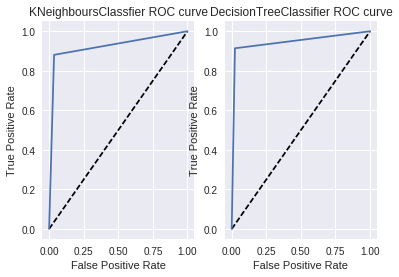

In [19]:
subplot_count = 1

for name, model in classification_models.items():
    y_pred = model.predict(X_test)
    fpr, tpr, tresholds = roc_curve(y_test, y_pred)
    
    plt.subplot(1, len(classification_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{}\t{}'.format(name, roc_auc_score(y_test, y_pred)))

LogisticRegression AUC:	0.8316869482005104


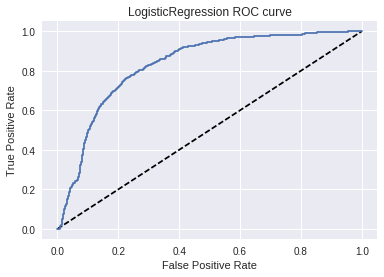

In [20]:
subplot_count = 1

for name, model in regression_models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
    
    plt.subplot(1, len(regression_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{} AUC:\t{}'.format(name, roc_auc_score(y_test, y_pred_prob)))

### 4.2.3 Scaling

The accuracy scores are calculated for a standardized version of the dataset

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [22]:
for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

    
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

KNeighboursClassfier	0.9466902475997979
DecisionTreeClassifier	0.966144517433047
LogisticRegression	0.8314805457301667


### 4.2.4 Feature Selection

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
pd.DataFrame(model.feature_importances_,
             index=pd.get_dummies(df.drop('left', axis=1)).columns,
             columns=['Importance'])

,Importance
satisfaction_level,0.268485
last_evaluation,0.134815
number_project,0.211228
average_monthly_hours,0.141572
time_spend_company,0.174204
work_accident_0,0.009136
work_accident_1,0.006833
promotion_last_5years_0,0.000986
promotion_last_5years_1,0.000897
salary_high,0.006088


In [25]:
columns_to_keep = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'time_spend_company',
    'average_monthly_hours'
]

X = df[columns_to_keep].values
y = df['left'].cat.codes.values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))
    
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))

KNeighboursClassfier	0.9552804446690247
DecisionTreeClassifier	0.9681657402728651
LogisticRegression	0.8279434057604851


## 4.3 Observations

**Simple logistic regression does not perform very well**

The data points are not linearly separable

*Logistic Regression however is fast to run and gives an idea initially about how hard the problem is*

**Non-linear classification algorithms outperform linear regression**

A non-linear function is required to classify data points

*Since simple off-the-shelf non-linear classifiers were able to perform a fair job, it is decided that algorithms capable of classifying highly non-linear data such as neural networks or SVMs coupled with custom kernels will only overfit the data*

**Feature selection improves the performance of K-Neighbors but not decision trees**

Decision trees incorporates the best features inherently (since the most contributing features are involved in the decision nodes in most cases)


## 4.4 Conclusion

The dataset is non-linearly classifiable to a good degree of generalization. Hence simple non-linear classification algorithms perform well.